<a href="https://colab.research.google.com/github/AdnanAli-10/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation.</u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## <b>Business Context</b>

### <b>Customer segmentation:</b>
Customer segmentation is the process by which you divide your customers up based on common characteristics so you can market to those customers more effectively.

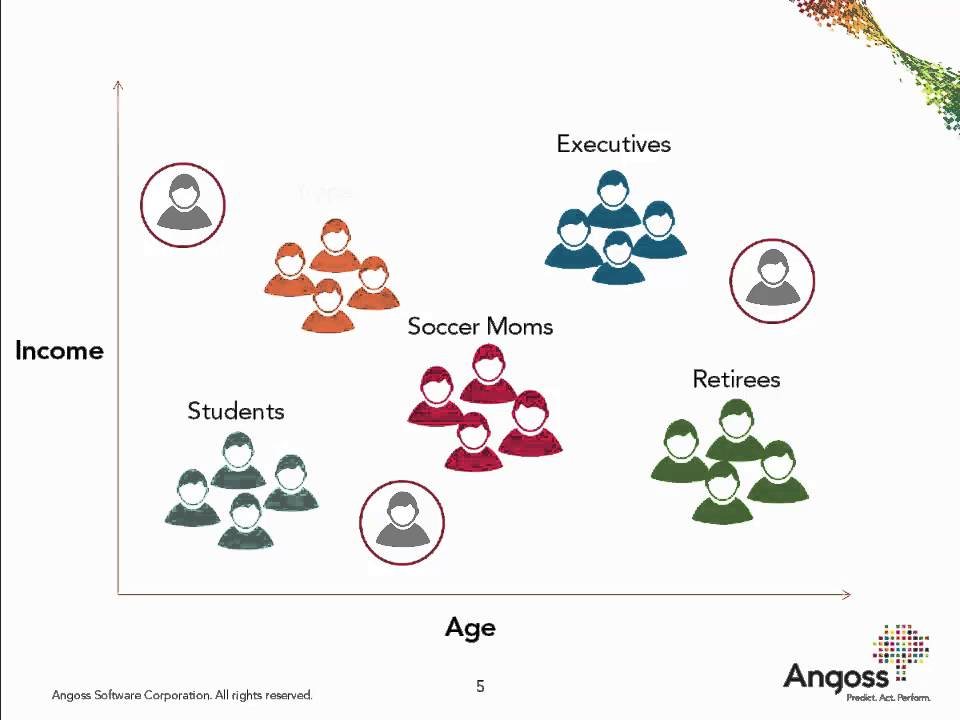

### <b>Different ways of segmentation:</b>

1. Demographic segmentation
2. Behavioral segmentation
3. Geographic segmentaion
4. Needs based segmentation
  
  and many more... 

### <b>Benefits of customer segmentation:</b>
1. Organised customer bases.
2. Targeted communication becomes easy.
3. Choosing top sales prospects becomes easy.
  
  and many more...

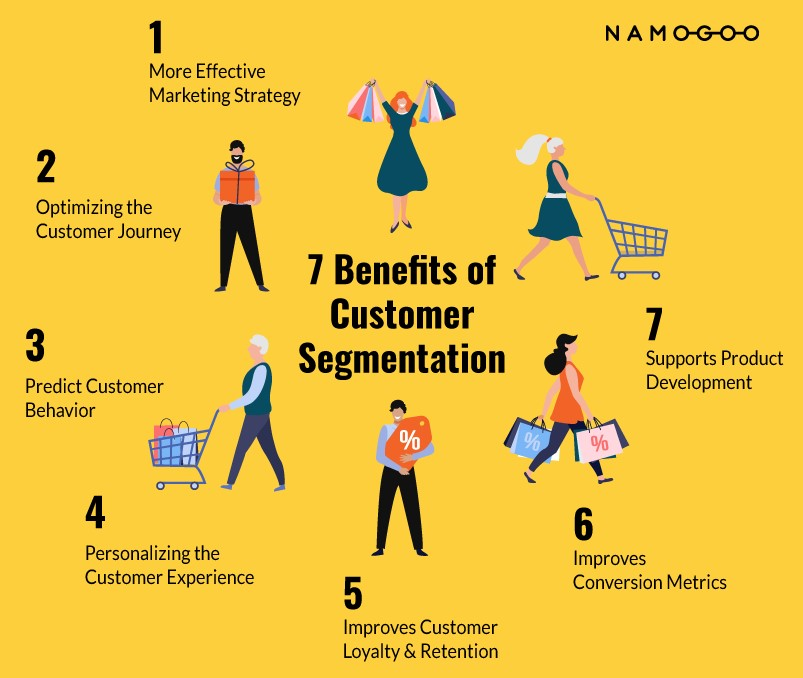

### <b>I'll be performing behavioral segmentation on our data in this project.</b> 

## <b>Project Flowchart:</b>
1. Initial preparations.
2. Data Cleaning.
3. EDA.
4. Feature Engineering.
5. Pre processing the data.
6. Clustering.
7. Cluster profiling.

## <b>Initial preparations:</b>

In [152]:
#Loading in the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

from plotly.offline import iplot
import plotly.graph_objs as go

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the data
cs_df = pd.read_excel('/content/drive/MyDrive/Customer segmentation - Syed Adnan S/Online Retail.xlsx')

## <b>Data Cleaning:</b>

### <b>Data Exploration</b>

In [4]:
#First 5 observations of the dataframe
cs_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#Last 5 observations of the dataframe
cs_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
#shape of the dataset
cs_df.shape

(541909, 8)

In [7]:
#A concise summary of the dataset
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
#A statistical description of the dataset
cs_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### <b>Handling null values:</b>

In [9]:
#Checking if the dataset has null values
cs_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There isn't any meaningfull way to impute values in the Description and CustomerID column, therefore I will just delete them.

In [10]:
#Dropping the null values in the dataset
cs_df.dropna(inplace=True)

In [11]:
#Checking if the deletion has worked
cs_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<b>As we can see, all the null values have been deleted.</b>

### <b>Handling duplicate values:</b>

In [12]:
#Checking if the data has duplicate values
cs_df.duplicated().sum()

5225

In [13]:
#Deleting the duplicate values from the data
cs_df.drop_duplicates(inplace=True)

In [14]:
#Checking if the duplicate deletion has worked 
cs_df.duplicated().sum()

0

<b>As we can see, all the duplicates have been removed.</b>

### <b>Removing Outliers:</b>

In [15]:
cs_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [16]:
#Defining a list of columns that can contain outliers
out_pos_cols = ['Quantity','UnitPrice']

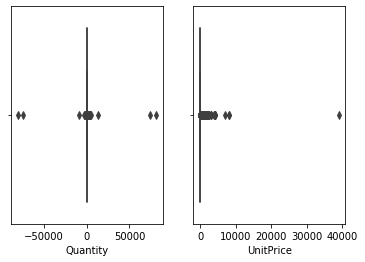

In [17]:
#Checking for outliers in the data
out_pos_cols = ['Quantity','UnitPrice']          #A list of columns that can possibly contain outliers.
for index, col in enumerate(out_pos_cols):
  plt.subplot(1,2,index+1)
  sns.boxplot(data = cs_df,x=col)

As we can see there are outliers in both the columns, Therefore we'll try to remove them. Here we can also see that, Quantity has negative values, which is practically impossible, these values represent cancelled orders and we'll deal with them later.

In [18]:
#Removing columns using the IQR method
def remove_outliers(data:pd.DataFrame,col:str):
  """A function that removes outliers using the IQR method"""
  
  #Calculating the upper and lower fence
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3-Q1
  upper_fence = Q3 + (1.5*IQR)
  lower_fence = Q1 - (1.5*IQR)
  
  #Deleting elements beyond the upper and lower fence
  if lower_fence<0:
    data = data[data[col]<=upper_fence]
  else:
    data = data[(data[col]>=lower_fence) and (data[col]<=upper_fence)]
  return data

In [19]:
#Applying the outlier removal function on two of our possible columns
cs_df = remove_outliers(cs_df,'Quantity')
cs_df = remove_outliers(cs_df,'UnitPrice')

In [20]:
cs_df.shape

(340447, 8)

### <b>Removing cancelled orders:</b>

In our data, we have cancelled orders which are represented by a capital C before the Invoice number. eg: C536379. I will be removing them from the dataset.

In [21]:
#Converting each value to string for comparison
cs_df['InvoiceNo'] = cs_df['InvoiceNo'].apply(str)

In [22]:
#To calculate the number of cancelled orders present
counter =1
def cancelled_counter(row):
  if 'C' in row:
   return counter
  else:
    return 0 

In [23]:
#Calculating number of cancelled orders before removal
cs_df['InvoiceNo'].apply(lambda x: cancelled_counter(x)).sum()

7182

There are 8,872 cancelled orders, which are bad for business, Further enquiry could be done on this, so as to why the orders where cancelled, and targeted marketing can be done to avoid this.

Now we have to figure out a way of fetching these columns. As mentioned earlier, these cancelled orders are linked with negative quantity values, So I will use that condition to fecth and delete them.

In [24]:
#Obtaining all the cancelled orders
cs_df[cs_df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


As we can see we have found the 8,872 observations that are cancelled orders and we can move on to deleting them.

In [25]:
#Deleting the cancelled orders.
cs_df = cs_df[cs_df['Quantity']>0]

In [26]:
#Checking if the deletion has worked
sum = cs_df['InvoiceNo'].apply(lambda x: cancelled_counter(x)).sum()
sum

0

In [27]:
#Converting the InvoiceNo column back to int type
cs_df['InvoiceNo'] = cs_df['InvoiceNo'].apply(str)

As we can see, the deletion has worked and we can move ahead.

## <b>Feature Engineering:</b>

### <b>Extracting columns from the InvoiceDate column:</b>

In [28]:
#Using the InvoiceDate column to extract different columns
cs_df['Hour'] = cs_df['InvoiceDate'].dt.hour
cs_df['DayOfM'] = cs_df['InvoiceDate'].dt.day
cs_df['DayOfW'] = cs_df['InvoiceDate'].dt.strftime('%A')
cs_df['Month'] = cs_df['InvoiceDate'].dt.month
cs_df['Year'] = cs_df['InvoiceDate'].dt.year
cs_df['InvoiceDate'] = cs_df['InvoiceDate'].dt.date

In [29]:
#A look of the dataframe after creating new columns
cs_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,DayOfM,DayOfW,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,8,1,Wednesday,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,8,1,Wednesday,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010


In [30]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333265 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    333265 non-null  object 
 1   StockCode    333265 non-null  object 
 2   Description  333265 non-null  object 
 3   Quantity     333265 non-null  int64  
 4   InvoiceDate  333265 non-null  object 
 5   UnitPrice    333265 non-null  float64
 6   CustomerID   333265 non-null  float64
 7   Country      333265 non-null  object 
 8   Hour         333265 non-null  int64  
 9   DayOfM       333265 non-null  int64  
 10  DayOfW       333265 non-null  object 
 11  Month        333265 non-null  int64  
 12  Year         333265 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 35.6+ MB


### <b>Forming the Total Amount column:</b>

Total amount = Unit price * Quantity 

In [31]:
#Creating the total amount column
cs_df['total_amount'] = cs_df['Quantity'] * cs_df['UnitPrice']

In [32]:
cs_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,DayOfM,DayOfW,Month,Year,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,8,1,Wednesday,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,8,1,Wednesday,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010,20.34


## <b>EDA:</b>

In [140]:
def create_visualisation(data:pd.DataFrame,x:str,y:str,title:str,x_label:str,y_label:str,display_value:bool=True,rotation:bool=True):
  """A function that creates a barplot visualisation for the given data"""
  plt.figure(figsize=(12,12))
  ax = sns.barplot(data=data,x=x,y=y)
  if display_value==True:
    for a in ax.patches:                                                        #To write values on top of each bar
        ax.annotate(format(a.get_height(), '.1f'),                 
                       (a.get_x() + a.get_width() / 2., a.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
  if rotation == True:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')             #Rotating the xticks to make them clear to read
  plt.title(title,size=30)
  plt.xlabel(x_label,size=30)
  plt.ylabel(y_label,size=30)
  plt.show()

### <b>Most frequently ordered products:</b>

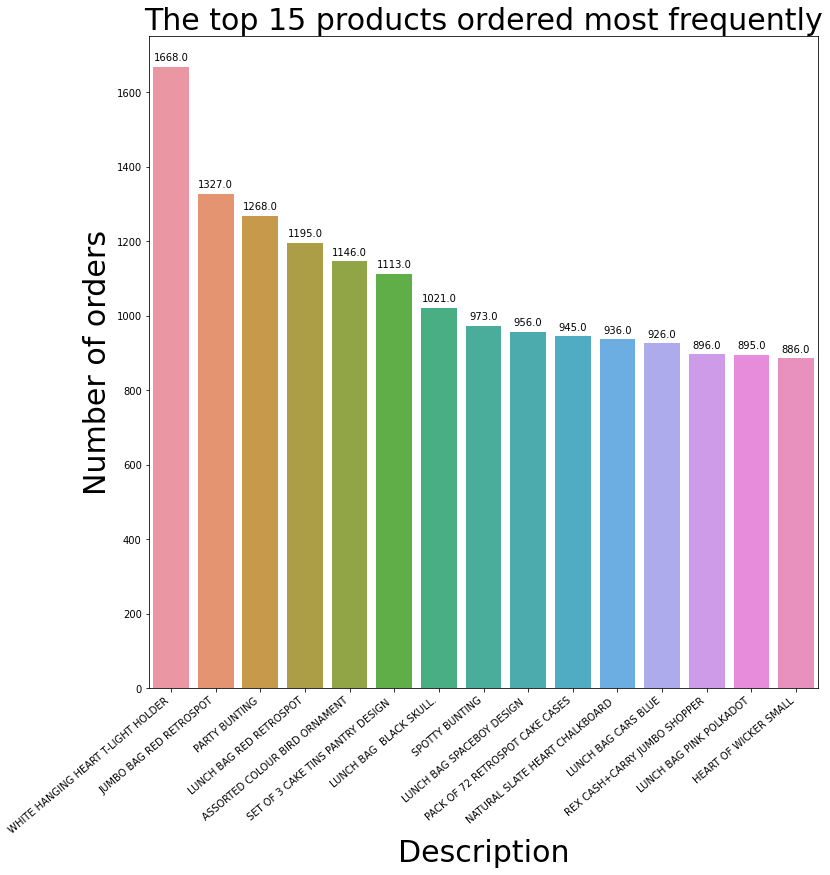

In [141]:
#Getting the top 15 most frequently ordered products
top_15_pro_freq = cs_df['Description'].value_counts().reset_index().rename(columns={'index':'Description','Description':'Count'})[0:15]

#Calling the visualisation function
create_visualisation(data=top_15_pro_freq,x='Description',y='Count',\
                     title='The top 15 products ordered most frequently',\
                     x_label='Description',y_label='Number of orders')

The product 'White hanging heart t-light holder' is the most frequently ordered product, around 1700 times. 'Jumbo bag red retrospot' is the second most ordered product, around 1300 times.

### <b>Products with the most quantity ordered:</b>

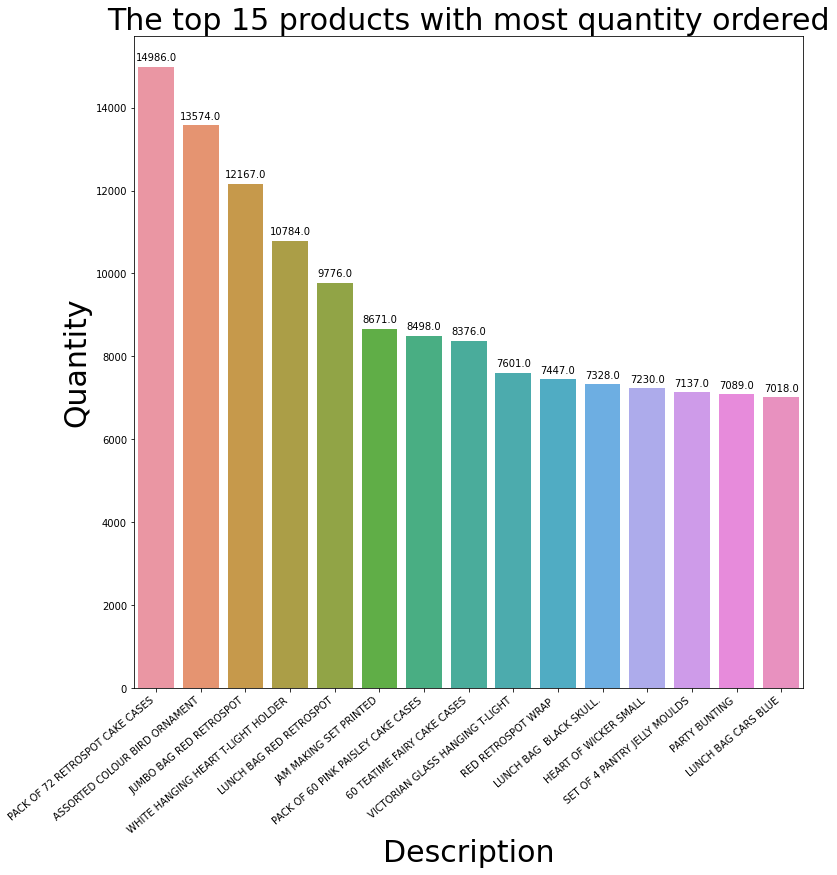

In [142]:
#Getting the top 15 products ordered with the most quantity
top_15_pro_quant = cs_df.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)[0:15]

#Calling the visualisation function
create_visualisation(data=top_15_pro_quant,x='Description',y='Quantity',\
                     title='The top 15 products with most quantity ordered',\
                     x_label='Description',y_label='Quantity')

The product 'Pack of 72 retrospot cake cases' has the most quantity ordered, around 15,000 units. 'Assorted colour bird ornament' is second with around 13,000 units ordered.

### <b>Products that make the most money:</b>

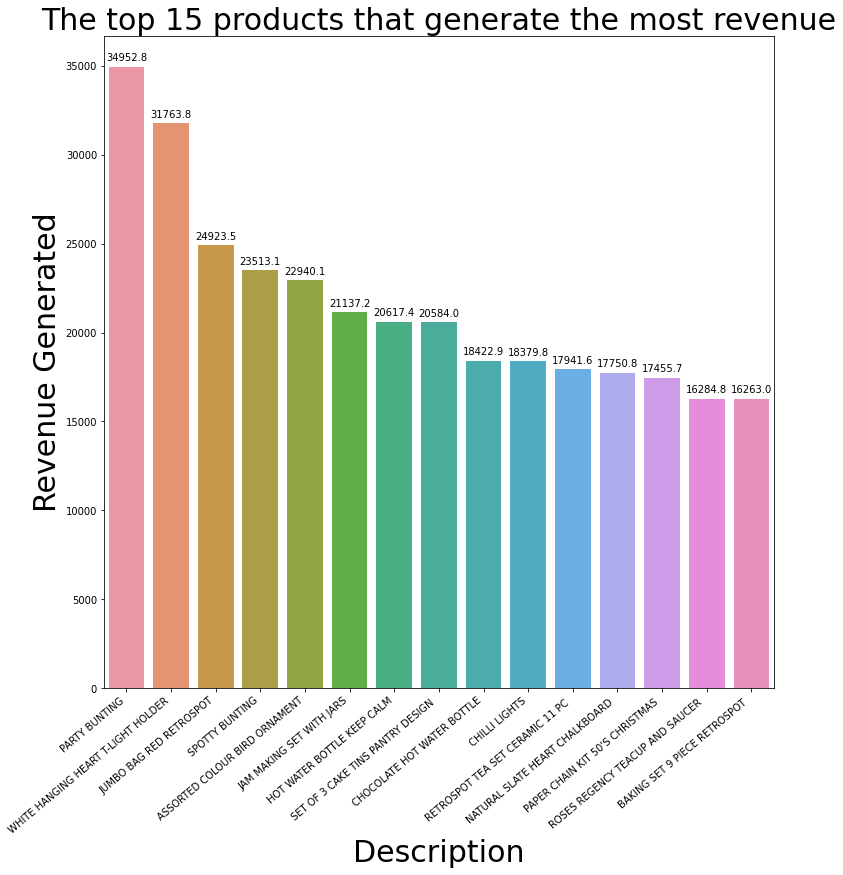

In [143]:
#Getting the top 15 products that generate the most amount of money
top_15_pro_money = cs_df.groupby('Description')['total_amount'].sum().reset_index().sort_values(by='total_amount',ascending=False)[0:15]

#Calling the visualisation function
create_visualisation(data=top_15_pro_money,x='Description',y='total_amount',\
                     title='The top 15 products that generate the most revenue',\
                     x_label='Description',y_label='Revenue Generated')

The product "Product Bunting" has made the most money, around 35,000 sterling. "White Hanging heart T-light holder" being the second, which has made around 32,000 sterling.

### <b>Countries from which most orders have been made:</b>

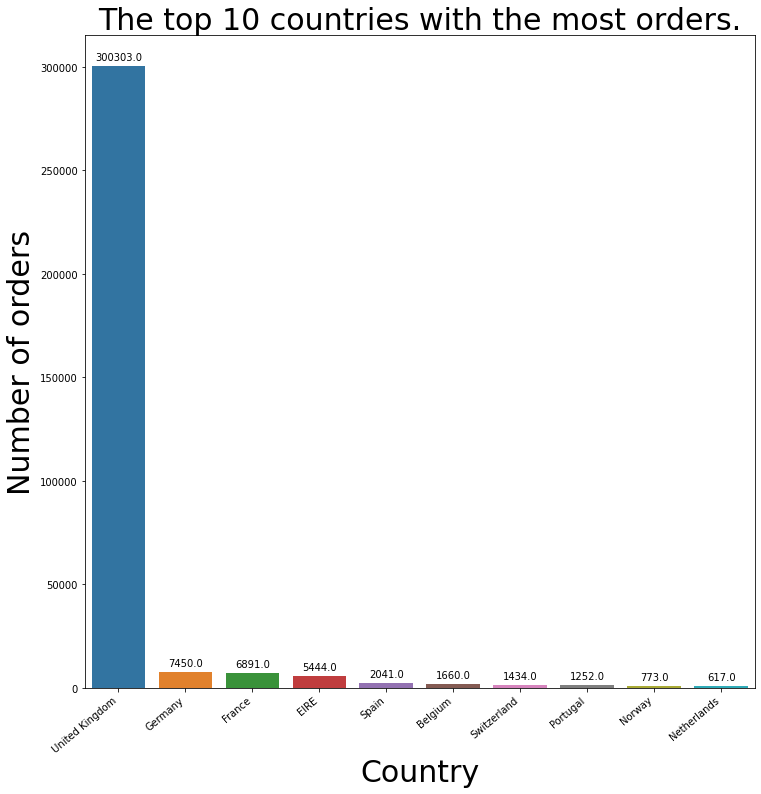

In [149]:
#Getting the countries with the most orders
top_countries_df = cs_df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Count'})[0:10]

#Calling the visualisation function
create_visualisation(data=top_countries_df,x='Country',y='Count',\
                     title='The top 10 countries with the most orders.',\
                     x_label='Country',y_label='Number of orders')

In [154]:
#Plotting a Choropleth map for countries
#Getting a count of the countries in the dataset
countries = cs_df['Country'].value_counts()

#Creating a dictionary with the data to plot the Choropleth map
data = dict(type='choropleth',locations = countries.index,locationmode = 'country names',\
            z = countries,text = countries.index, colorbar = {'title':'Order nb.'},\
            colorscale=[[0, 'rgb(224,255,255)'],[0.01, 'rgb(166,206,227)'],\
                        [0.02, 'rgb(31,120,180)'],[0.03, 'rgb(178,223,138)'],\
                        [0.05, 'rgb(51,160,44)'],[0.10, 'rgb(251,154,153)'],\
                        [0.20, 'rgb(255,255,0)'],[1, 'rgb(227,26,28)']],reversescale = False)

#Defining the layout
layout = dict(title='Number of orders per country',geo = dict(showframe = True, projection={'type':'mercator'}))

#Plotting the Choropleth map
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

As we can see, United Kingdom has the most orders placed, with around 3 lakh orders. Germany being second, but way less than United Kingdom.

### <b>Hours for which most orders are made:</b>

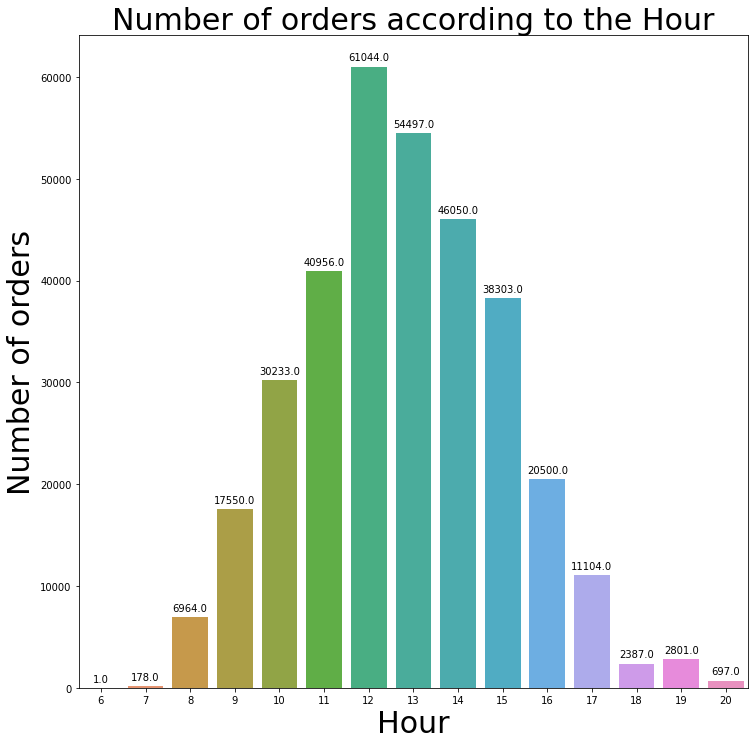

In [145]:
#Getting the number of orders for each hour
hour_df = cs_df['Hour'].value_counts().reset_index().sort_values(by='index')

#Calling the visualisation function
create_visualisation(data=hour_df,x='index',y='Hour',\
                     title='Number of orders according to the Hour',\
                     x_label='Hour',y_label='Number of orders',rotation=False)

Most orders are made in the 12th hour, i.e 12pm to 1pm, and the least orders are made in the 6th hour, i.e 6am to 7am. We can see that no orders are made between 8pm and 6am.

### <b>Day of the month on which most orders are made:</b>

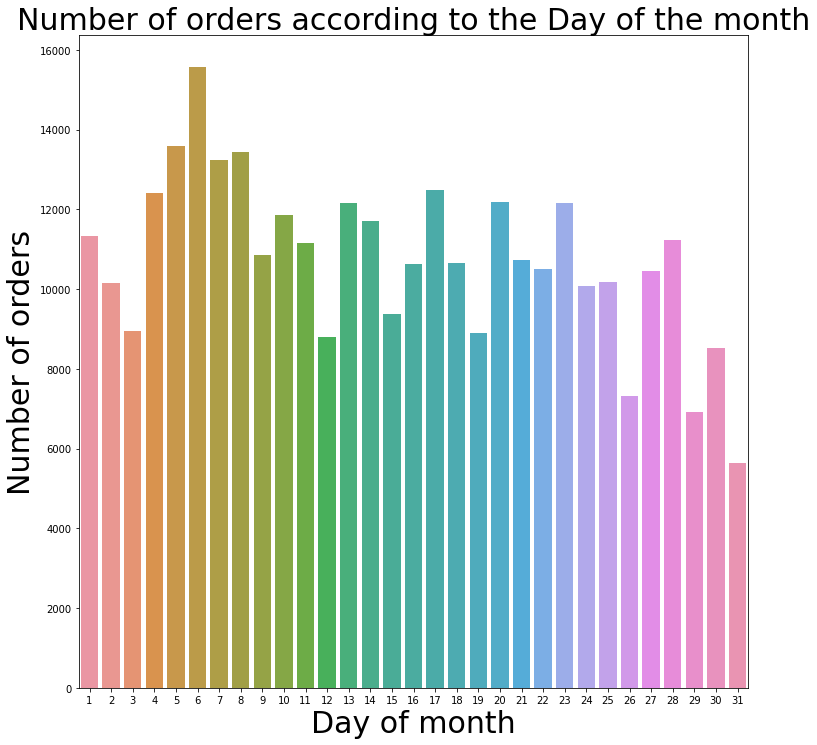

In [146]:
#Getting the number of orders as per the day of the month
day_of_month_df = cs_df['DayOfM'].value_counts().reset_index().sort_values(by='index')

#Calling the visualisation function
create_visualisation(data=day_of_month_df,x='index',y='DayOfM',\
                     title='Number of orders according to the Day of the month',\
                     x_label='Day of month',y_label='Number of orders',display_value=False,rotation=False)

The 6th day of the month has the highest number of orders and the 31st day has the lowest.

### <b>Day of the week on which most orders are made:</b>

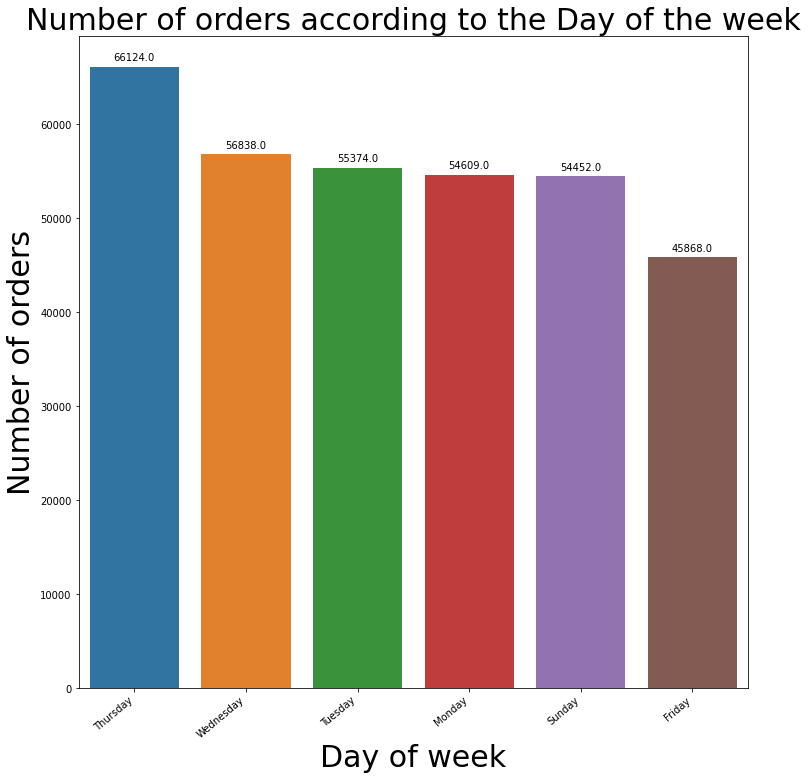

In [147]:
#Getting the number of orders as per the day of the week
day_of_week_df = cs_df['DayOfW'].value_counts().reset_index()

#Calling the visualisation function
create_visualisation(data=day_of_week_df,x='index',y='DayOfW',\
                     title='Number of orders according to the Day of the week',\
                     x_label='Day of week',y_label='Number of orders')

Most of the orders are made on Thurday,around 66 thousand, and the least number of orders are made on Friday, around 46 thousand.

### <b>Most orders made according to the month:</b>

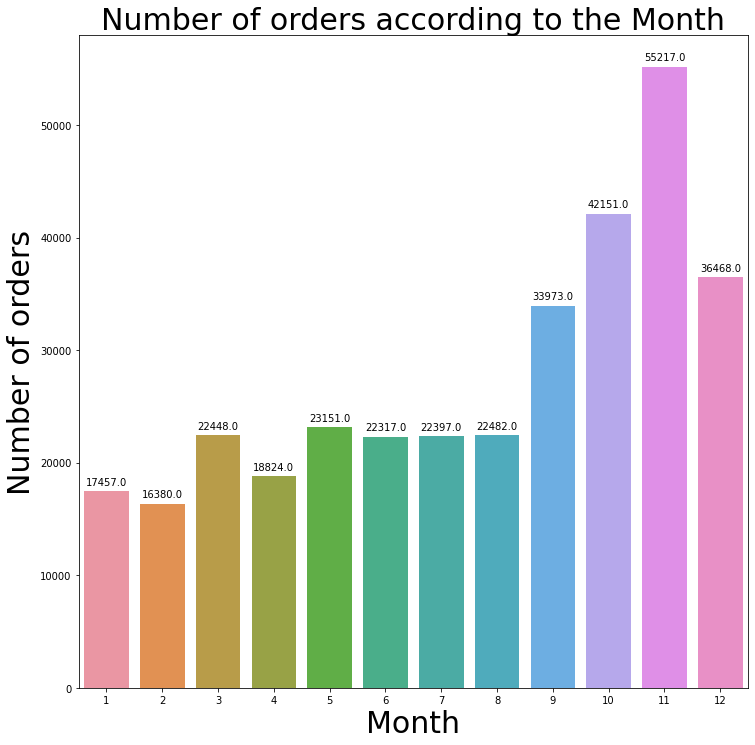

In [148]:
#Getting the number of orders as per the month
month_df = cs_df['Month'].value_counts().reset_index().sort_values(by='index')

#Calling the visualisation function
create_visualisation(data=month_df,x='index',y='Month',\
                     title='Number of orders according to the Month',\
                     x_label='Month',y_label='Number of orders',rotation=False)

The most number of orders are made in the 11th month, i.e December, and the least in the 2nd month, i.e February.

### <b>In this dataset we have only 1 month for the year 2010 and 12 months for 2011, therefore I think there is no need to perform any analysis on the year column.</b>

## Yes